In [ ]:
!pip install empath
import pickle
import numpy as np
import nltk 
import string 
import re 
import inflect 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from empath import Empath
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
import time
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
lexicon = Empath()
p = inflect.engine() 

     |████████████████████████████████| 61kB 3.8MB/s 
  Created wheel for empath: filename=empath-0.89-cp36-none-any.whl size=57823 sha256=32e17b7db3bf9e5c278393dc8733438e1fc0609bc313fc32381bfcd70441e297
  Stored in directory: /root/.cache/pip/wheels/84/ea/2f/2bc54d4f9985ce61753ebc5b00cb2df51d855589267c667308
Successfully built empath


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import files
files.upload()

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d virenkathiriya/politifact
import zipfile
with zipfile.ZipFile('./politifact.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

    

Saving kaggle.json to kaggle.json
100% 4.69M/4.69M [00:00<00:00, 29.6MB/s]



In [ ]:
poli = pd.read_csv('Politifact_.csv')
print(poli)
df = pd.DataFrame()
df['text'] = poli['text']
df['Category'] = poli['is_fake']   

     field1  ... link_credibility_score
0         0  ...                   0.09
1         1  ...                   0.05
2         2  ...                   0.03
3         3  ...                   0.07
4         4  ...                   0.09
..      ...  ...                    ...
883     960  ...                   0.07
884     961  ...                   0.10
885     962  ...                   0.07
886     963  ...                   0.01
887     964  ...                    NaN

[888 rows x 53 columns]


In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.reset_index().index

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
df['index']=df.reset_index().index

In [ ]:
df

,text,Category
179,The Kardashian family has a net worth in the h...,True
267,The U.S. Consumer Product Safety Commission is...,True
271,Español\n\nThe current influenza season has be...,True
535,Watch Queue Queue\n\nWatch Queue Queue Remove ...,False
465,Home / President\n\nFOXNews.com\n\nThe followi...,False
...,...,...
349,BUSTED: Obama is Holding Secret Meetings to OV...,True
507,"During the presidential race, Republican candi...",False
631,Email this Page To:\n\nMultiple addresses sepe...,False
533,"Streamed live on Jul 21, 2018\n\nThe Virginia ...",False


In [ ]:
def empath_feature_calc(text):
    try:
        return lexicon.analyze(text,normalize=True)
    except:
        return None

df['empath_features'] = df['text'].apply(empath_feature_calc)

In [ ]:
text_analysis=df['empath_features'].iloc[1]
print(text_analysis)
print(df.Category.shape)
print(df.shape)
print(df.empath_features)

{'help': 0.005376344086021506, 'office': 0.005376344086021506, 'dance': 0.0, 'money': 0.010752688172043012, 'wedding': 0.0, 'domestic_work': 0.0, 'sleep': 0.0, 'medical_emergency': 0.010752688172043012, 'cold': 0.0, 'hate': 0.005376344086021506, 'cheerfulness': 0.0, 'aggression': 0.005376344086021506, 'occupation': 0.0, 'envy': 0.0, 'anticipation': 0.0, 'family': 0.0, 'vacation': 0.0, 'crime': 0.010752688172043012, 'attractive': 0.0, 'masculine': 0.0, 'prison': 0.0, 'health': 0.010752688172043012, 'pride': 0.0, 'dispute': 0.005376344086021506, 'nervousness': 0.0, 'government': 0.010752688172043012, 'weakness': 0.0, 'horror': 0.0, 'swearing_terms': 0.0, 'leisure': 0.0, 'suffering': 0.016129032258064516, 'royalty': 0.005376344086021506, 'wealthy': 0.005376344086021506, 'tourism': 0.0, 'furniture': 0.0, 'school': 0.005376344086021506, 'magic': 0.005376344086021506, 'beach': 0.0, 'journalism': 0.005376344086021506, 'morning': 0.0, 'banking': 0.0, 'social_media': 0.005376344086021506, 'exer

In [ ]:
newDF = pd.DataFrame(columns = list(df.empath_features[0].keys()))
# print(newDF.head())
exclude_idx = []
for i in range(df.shape[0]):
    dict_new_dataframe = df.empath_features[i]
    try:
        new_df = pd.DataFrame.from_dict(dict_new_dataframe.items()).transpose()
        header_new_dataframe = new_df.iloc[0]  # 0th index is header
        new_df = new_df[1:]  # fetch data except header
        new_df.columns = header_new_dataframe #set header as dataframe header in pandas
        newDF = newDF.append(new_df, ignore_index=True) # populate new dataframe with new data
    except:
        exclude_idx.append(i)
        pass

# print(df.shape)
# print(df.Category.shape)
# print(newDF.shape) # 194 categories converted into attributes for each row present in original dataset..

In [ ]:
newDF

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,...,car,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,0.00327869,0.00327869,0,0.00983607,0,0,0,0,0,0.00327869,0,0.00655738,0.00327869,0,0,0,0,0.00327869,0,0,0.00327869,0,0,0.0131148,0,0.00327869,0,0,0,0,0,0,0,0,0.00327869,0.0196721,0,0,0,0,...,0,0.00655738,0.00327869,0.00327869,0,0.00655738,0,0,0,0,0.00327869,0,0,0,0,0,0.00327869,0.00327869,0.00327869,0.00655738,0.00327869,0,0.00327869,0.00983607,0,0.00655738,0,0,0,0,0,0,0,0,0.0163934,0,0,0,0.00655738,0
1,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0,0,0.0555556,0,...,0,0,0,0,0,0,0.0555556,0,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0
2,0,0.00291545,0,0,0.00291545,0,0,0,0,0,0,0,0,0,0,0,0,0.00291545,0,0,0.00291545,0,0,0,0,0,0.00291545,0,0,0,0,0,0,0,0,0.00291545,0.00291545,0,0.0058309,0,...,0,0.00291545,0,0,0.0058309,0.00291545,0,0.00291545,0.00291545,0,0,0,0,0,0.00291545,0.00291545,0,0.0058309,0,0,0,0.00291545,0,0,0.00291545,0,0.00291545,0,0,0,0,0,0,0,0.00291545,0,0,0,0,0.0058309
3,0,0.00581395,0,0,0.00193798,0,0,0,0,0,0,0.00193798,0.00968992,0,0,0,0,0,0.00193798,0,0,0,0,0.00387597,0,0.00775194,0,0,0,0,0,0,0,0,0,0.00193798,0,0,0.00968992,0.00193798,...,0,0.00193798,0.00193798,0,0.00193798,0.00193798,0.00387597,0,0.00581395,0,0,0,0,0,0,0,0,0,0.00193798,0,0,0.00193798,0.00193798,0.00387597,0.00193798,0,0,0,0,0,0,0,0,0,0.00775194,0,0.00775194,0,0.00387597,0.00387597
4,0,0.030303,0,0,0,0,0,0,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,0,0,0,0.030303,0,...,0,0.030303,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.00135685,0.000678426,0,0.00135685,0,0,0,0,0.0027137,0.00203528,0,0.00135685,0,0.000678426,0,0,0.000678426,0.00814111,0.000678426,0.00135685,0.00339213,0.000678426,0,0.00407056,0.0027137,0.0115332,0,0.00135685,0.000678426,0,0.00407056,0,0,0,0,0.00135685,0.000678426,0,0.000678426,0,...,0.00203528,0.0027137,0.000678426,0,0.00203528,0.00474898,0.00339213,0,0.000678426,0.00135685,0.00135685,0.000678426,0.00135685,0,0.00542741,0.000678426,0.000678426,0,0.000678426,0.00203528,0,0.00542741,0.000678426,0.0128901,0,0.000678426,0.000678426,0,0,0,0.00814111,0.00135685,0,0,0.00339213,0.00203528,0.00339213,0,0.000678426,0.000678426
884,0.0130923,0.00935162,0,0.0261845,0.0112219,0.000623441,0,0.00124688,0.00187032,0.00187032,0,0.000623441,0.00436409,0,0.00124688,0.00187032,0.0105985,0,0,0.00187032,0,0.00124688,0.000623441,0.00249377,0.000623441,0.0168329,0,0,0.00187032,0.000623441,0.00249377,0,0.0074813,0,0.000623441,0.0074813,0,0.000623441,0.00685786,0.00187032,...,0,0.00436409,0.00124688,0.00249377,0.00436409,0.00187032,0.00187032,0.000623441,0.00685786,0,0,0.00124688,0.0124688,0,0.00249377,0,0.000623441,0,0.0105985,0.00498753,0,0.00498753,0.00187032,0.00685786,0.000623441,0.0224439,0.00124688,0,0,0.000623441,0,0.00249377,0,0.00124688,0.00935162,0,0.00374065,0,0.000623441,0
885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0588235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...

In [ ]:
print(df.Category.shape)
category_in_original_dataframe=df.Category
print(len(category_in_original_dataframe))
for idx in exclude_idx:
  if(idx in category_in_original_dataframe):
    category_in_original_dataframe.pop(idx)
print(category_in_original_dataframe)  # 10 indexes removed..
newDF['Category']=category_in_original_dataframe
print(newDF.shape)

(888,)
888
179     True
267     True
271     True
535    False
465    False
       ...  
349     True
507    False
631    False
533    False
274     True
Name: Category, Length: 888, dtype: bool
(888, 195)


In [ ]:
latestDF = newDF.dropna()  ## Remove rows with value NAN
print(latestDF.shape)

latest = list(latestDF.Category)
trueCategory = ['HALF TRUE','True','TRUE','PARTLY TRUE','Half True','Partly true','Partially true','Mostly True','MOSTLY TRUE']
falseCategory = ['misleading',  'Mostly false', 'False',  'FALSE', 'Explanatory', 'Correct', 'MOSTLY FALSE', 'Unlikely',
                'No evidence', 'PARTLY FALSE', 'Mainly false', 'No Evidence', 'Misleading',
               'false and misleading', 'Conspiracy theory', 'Mostly False', 'Partly false', 'Fake',
               'Misleading/False',  'Pants on Fire!', 'MISLEADING', 'Partially false', 'Not true',
               "(Org. doesn't apply rating)"]

allot=[]
for val in latest:
  if val in trueCategory:
    allot.append('TRUE')
  else:
    allot.append('FALSE')

print(allot)
print(len(allot))

(888, 195)
['FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE'

In [ ]:
latestDF['latestCategory']=allot
latestDF

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,government,weakness,horror,swearing_terms,leisure,suffering,royalty,wealthy,tourism,furniture,school,magic,beach,journalism,morning,...,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Category,latestCategory
0,0.00327869,0.00327869,0,0.00983607,0,0,0,0,0,0.00327869,0,0.00655738,0.00327869,0,0,0,0,0.00327869,0,0,0.00327869,0,0,0.0131148,0,0.00327869,0,0,0,0,0,0,0,0,0.00327869,0.0196721,0,0,0,0,...,0.00327869,0.00327869,0,0.00655738,0,0,0,0,0.00327869,0,0,0,0,0,0.00327869,0.00327869,0.00327869,0.00655738,0.00327869,0,0.00327869,0.00983607,0,0.00655738,0,0,0,0,0,0,0,0,0.0163934,0,0,0,0.00655738,0,True,FALSE
1,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0,0,0.0555556,0,...,0,0,0,0,0.0555556,0,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,True,FALSE
2,0,0.00291545,0,0,0.00291545,0,0,0,0,0,0,0,0,0,0,0,0,0.00291545,0,0,0.00291545,0,0,0,0,0,0.00291545,0,0,0,0,0,0,0,0,0.00291545,0.00291545,0,0.0058309,0,...,0,0,0.0058309,0.00291545,0,0.00291545,0.00291545,0,0,0,0,0,0.00291545,0.00291545,0,0.0058309,0,0,0,0.00291545,0,0,0.00291545,0,0.00291545,0,0,0,0,0,0,0,0.00291545,0,0,0,0,0.0058309,True,FALSE
3,0,0.00581395,0,0,0.00193798,0,0,0,0,0,0,0.00193798,0.00968992,0,0,0,0,0,0.00193798,0,0,0,0,0.00387597,0,0.00775194,0,0,0,0,0,0,0,0,0,0.00193798,0,0,0.00968992,0.00193798,...,0.00193798,0,0.00193798,0.00193798,0.00387597,0,0.00581395,0,0,0,0,0,0,0,0,0,0.00193798,0,0,0.00193798,0.00193798,0.00387597,0.00193798,0,0,0,0,0,0,0,0,0,0.00775194,0,0.00775194,0,0.00387597,0.00387597,True,FALSE
4,0,0.030303,0,0,0,0,0,0,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,0,0,0,0.030303,0,...,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.00135685,0.000678426,0,0.00135685,0,0,0,0,0.0027137,0.00203528,0,0.00135685,0,0.000678426,0,0,0.000678426,0.00814111,0.000678426,0.00135685,0.00339213,0.000678426,0,0.00407056,0.0027137,0.0115332,0,0.00135685,0.000678426,0,0.00407056,0,0,0,0,0.00135685,0.000678426,0,0.000678426,0,...,0.000678426,0,0.00203528,0.00474898,0.00339213,0,0.000678426,0.00135685,0.00135685,0.000678426,0.00135685,0,0.00542741,0.000678426,0.000678426,0,0.000678426,0.00203528,0,0.00542741,0.000678426,0.0128901,0,0.000678426,0.000678426,0,0,0,0.00814111,0.00135685,0,0,0.00339213,0.00203528,0.00339213,0,0.000678426,0.000678426,False,FALSE
884,0.0130923,0.00935162,0,0.0261845,0.0112219,0.000623441,0,0.00124688,0.00187032,0.00187032,0,0.000623441,0.00436409,0,0.00124688,0.00187032,0.0105985,0,0,0.00187032,0,0.00124688,0.000623441,0.00249377,0.000623441,0.0168329,0,0,0.00187032,0.000623441,0.00249377,0,0.0074813,0,0.000623441,0.0074813,0,0.000623441,0.00685786,0.00187032,...,0.00124688,0.00249377,0.00436409,0.00187032,0.00187032,0.000623441,0.00685786,0,0,0.00124688,0.0124688,0,0.00249377,0,0.000623441,0,0.0105985,0.00498753,0,0.00498753,0.00187032,0.00685786,0.000623441,0.0224439,0.00124688,0,0,0.000623441,0,0.00249377,0,0.00124688,0.00935162,0,0.00374065,0,0.000623441,0,False,FALSE
885,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0588235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,.

In [ ]:
deceptive_news=latestDF[latestDF["latestCategory"]=='FALSE']
print(deceptive_news)

0          help       office       dance  ...      musical Category latestCategory
0    0.00327869   0.00327869           0  ...            0     True          FALSE
1             0    0.0277778           0  ...            0     True          FALSE
2             0   0.00291545           0  ...    0.0058309     True          FALSE
3             0   0.00581395           0  ...   0.00387597     True          FALSE
4             0     0.030303           0  ...            0     True          FALSE
..          ...          ...         ...  ...          ...      ...            ...
883  0.00135685  0.000678426           0  ...  0.000678426    False          FALSE
884   0.0130923   0.00935162           0  ...            0    False          FALSE
885           0            0           0  ...            0    False          FALSE
886   0.0784314            0           0  ...            0    False          FALSE
887  0.00152439            0  0.00152439  ...            0    False          FALSE

[88

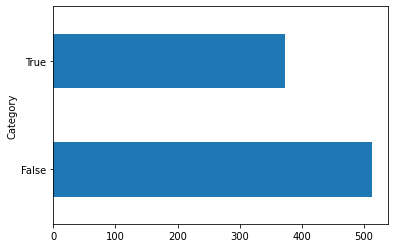

In [ ]:
newDF.groupby(['Category']).size().plot(kind='barh')

Text Summ

In [ ]:
!pip install empath
import pickle
import numpy as np
import nltk 
import string 
import re 
import inflect 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from empath import Empath
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
import time
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
lexicon = Empath()
p = inflect.engine() 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time
vectorizer = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1), # considering only 1-grams
                        min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.3)      # cut words present in more than 30% of documents 
t0 = time.time()

tfidf = vectorizer.fit_transform(df['text'])

In [ ]:
from sklearn.decomposition import NMF
n_topics = 15
nmf = NMF(n_components=n_topics,random_state=0)
topics = nmf.fit_transform(tfidf)
top_n_words = 5
t_words, word_strengths = {}, {}
for t_id, t in enumerate(nmf.components_):
    t_words[t_id] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-top_n_words - 1:-1]]
    word_strengths[t_id] = t[t.argsort()[:-top_n_words - 1:-1]]
t_words

{0: ['think', 'going', 've', 'want', 'let'],
 1: ['trump', 'donald', 'white', 'news', 'russia'],
 2: ['com', 'contact', '800', 'help', 'need'],
 3: ['available', 'video', 'transcript', 'try', 'later'],
 4: ['site', 'data', 'stories', 'use', 'website'],
 5: ['watch', 'remove', '10', 'com', 'office'],
 6: ['version', 'supported', 'experience', 'using', 'best'],
 7: ['police', 'gun', 'old', 'school', 'according'],
 8: ['mccain', 'john', '2008', 'com', 'senator'],
 9: ['health', 'care', 'insurance', 'tax', 'medicare'],
 10: ['tweet', 'city', 'option', 'learn', 'add'],
 11: ['clinton', 'hillary', 'foundation', 'senator', 'email'],
 12: ['applause', 've', 'got', 'work', 'jobs'],
 13: ['united', 'world', 'security', 'war', 'iraq'],
 14: ['obama', 'barack', 'white', 'senator', 'change']}

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('tfidf', vectorizer),
    ('nmf', nmf)
])

In [ ]:
t = pipe.transform(df['text']) 
t = pd.DataFrame(t, columns=[str(t_words[i]) for i in range(0, n_topics)])
t.head()

,"['think', 'going', 've', 'want', 'let']","['trump', 'donald', 'white', 'news', 'russia']","['com', 'contact', '800', 'help', 'need']","['available', 'video', 'transcript', 'try', 'later']","['site', 'data', 'stories', 'use', 'website']","['watch', 'remove', '10', 'com', 'office']","['version', 'supported', 'experience', 'using', 'best']","['police', 'gun', 'old', 'school', 'according']","['mccain', 'john', '2008', 'com', 'senator']","['health', 'care', 'insurance', 'tax', 'medicare']","['tweet', 'city', 'option', 'learn', 'add']","['clinton', 'hillary', 'foundation', 'senator', 'email']","['applause', 've', 'got', 'work', 'jobs']","['united', 'world', 'security', 'war', 'iraq']","['obama', 'barack', 'white', 'senator', 'change']"
0,0.006805,0.0,0.026288,0.000000,0.000000,0.000000,0.020571,0.113585,0.0,0.005586,0.021720,0.000000,0.026857,0.022071,0.000000
1,0.000000,0.0,0.036168,0.000000,0.007828,0.000000,0.007670,0.044439,0.0,0.035303,0.006530,0.004759,0.000000,0.027549,0.000000
2,0.007134,0.0,0.004702,0.021773,0.055090,0.000174,0.001447,0.026821,0.0,0.123466,0.019781,0.000481,0.025139,0.065800,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.512174,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.054483,0.0,0.000000,0.010902,0.000000,0.006692,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.010493,0.279908,0.129726


In [ ]:
t

,"['think', 'going', 've', 'want', 'let']","['trump', 'donald', 'white', 'news', 'russia']","['com', 'contact', '800', 'help', 'need']","['available', 'video', 'transcript', 'try', 'later']","['site', 'data', 'stories', 'use', 'website']","['watch', 'remove', '10', 'com', 'office']","['version', 'supported', 'experience', 'using', 'best']","['police', 'gun', 'old', 'school', 'according']","['mccain', 'john', '2008', 'com', 'senator']","['health', 'care', 'insurance', 'tax', 'medicare']","['tweet', 'city', 'option', 'learn', 'add']","['clinton', 'hillary', 'foundation', 'senator', 'email']","['applause', 've', 'got', 'work', 'jobs']","['united', 'world', 'security', 'war', 'iraq']","['obama', 'barack', 'white', 'senator', 'change']"
0,0.006805,0.000000,0.026288,0.000000,0.000000,0.000000,0.020571,0.113585,0.000000,0.005586,0.021720,0.000000,0.026857,0.022071,0.000000
1,0.000000,0.000000,0.036168,0.000000,0.007828,0.000000,0.007670,0.044439,0.000000,0.035303,0.006530,0.004759,0.000000,0.027549,0.000000
2,0.007134,0.000000,0.004702,0.021773,0.055090,0.000174,0.001447,0.026821,0.000000,0.123466,0.019781,0.000481,0.025139,0.065800,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.512174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.054483,0.000000,0.000000,0.010902,0.000000,0.006692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010493,0.279908,0.129726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.000000,0.005129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.248793
884,0.009460,0.068608,0.000000,0.000000,0.013568,0.000000,0.000000,0.004680,0.000000,0.000000,0.000000,0.000000,0.000000,0.087813,0.000000
885,0.011144,0.000000,0.000000,0.000000,0.000000,0.008839,0.000000,0.000000,0.405484,0.000000,0.002864,0.000000,0.000000,0.000000,0.000000
886,0.000000,0.008208,0.073022,0.000000,0.017693,0.001473,0.000000,0.032651,0.027283,0.011478,0.000000,0.010287,0.000000,0.000738,0.008073


In [ ]:
merged=pd.concat([t, newDF], axis=1)

In [ ]:
merged

,"['think', 'going', 've', 'want', 'let']","['trump', 'donald', 'white', 'news', 'russia']","['com', 'contact', '800', 'help', 'need']","['available', 'video', 'transcript', 'try', 'later']","['site', 'data', 'stories', 'use', 'website']","['watch', 'remove', '10', 'com', 'office']","['version', 'supported', 'experience', 'using', 'best']","['police', 'gun', 'old', 'school', 'according']","['mccain', 'john', '2008', 'com', 'senator']","['health', 'care', 'insurance', 'tax', 'medicare']","['tweet', 'city', 'option', 'learn', 'add']","['clinton', 'hillary', 'foundation', 'senator', 'email']","['applause', 've', 'got', 'work', 'jobs']","['united', 'world', 'security', 'war', 'iraq']","['obama', 'barack', 'white', 'senator', 'change']",help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Category
0,0.006805,0.000000,0.026288,0.000000,0.000000,0.000000,0.020571,0.113585,0.000000,0.005586,0.021720,0.000000,0.026857,0.022071,0.000000,0.00327869,0.00327869,0,0.00983607,0,0,0,0,0,0.00327869,0,0.00655738,0.00327869,0,0,0,0,0.00327869,0,0,0.00327869,0,0,0.0131148,0,...,0.00655738,0.00327869,0.00327869,0,0.00655738,0,0,0,0,0.00327869,0,0,0,0,0,0.00327869,0.00327869,0.00327869,0.00655738,0.00327869,0,0.00327869,0.00983607,0,0.00655738,0,0,0,0,0,0,0,0,0.0163934,0,0,0,0.00655738,0,True
1,0.000000,0.000000,0.036168,0.000000,0.007828,0.000000,0.007670,0.044439,0.000000,0.035303,0.006530,0.004759,0.000000,0.027549,0.000000,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0555556,0,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,True
2,0.007134,0.000000,0.004702,0.021773,0.055090,0.000174,0.001447,0.026821,0.000000,0.123466,0.019781,0.000481,0.025139,0.065800,0.000000,0,0.00291545,0,0,0.00291545,0,0,0,0,0,0,0,0,0,0,0,0,0.00291545,0,0,0.00291545,0,0,0,0,...,0.00291545,0,0,0.0058309,0.00291545,0,0.00291545,0.00291545,0,0,0,0,0,0.00291545,0.00291545,0,0.0058309,0,0,0,0.00291545,0,0,0.00291545,0,0.00291545,0,0,0,0,0,0,0,0.00291545,0,0,0,0,0.0058309,True
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.512174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.00581395,0,0,0.00193798,0,0,0,0,0,0,0.00193798,0.00968992,0,0,0,0,0,0.00193798,0,0,0,0,0.00387597,0,...,0.00193798,0.00193798,0,0.00193798,0.00193798,0.00387597,0,0.00581395,0,0,0,0,0,0,0,0,0,0.00193798,0,0,0.00193798,0.00193798,0.00387597,0.00193798,0,0,0,0,0,0,0,0,0,0.00775194,0,0.00775194,0,0.00387597,0.00387597,True
4,0.054483,0.000000,0.000000,0.010902,0.000000,0.006692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010493,0.279908,0.129726,0,0.030303,0,0,0,0,0,0,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,0,0,0,...,0.030303,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.000000,0.005129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.248793,0.00135685,0.000678426,0,0.00135685,0,0,0,0,0.0027137,0.00203528,0,0.00135685,0,0.000678426,0,0,0.000678426,0.00814111,0.000678426,0.00135685,0.00339213,0.000678426,0,0.00407056,0.0027137,...,0.0027137,0.000678426,0,0

In [ ]:
import time
def test_models(models,X_train, X_test, y_train, y_test):
    start = time.time()
    score=[]
    acc=[]
    for model_name in models:
        model=model_name
        model.fit(X_train,y_train)
        y_test_hat=model.predict(X_test)
        ac=accuracy_score(y_test_hat,y_test)
        cm=confusion_matrix(y_test, y_test_hat)

        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)

        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        # Precision or positive predictive value
        PPV = TP/(TP+FP)
        # Negative predictive value
        NPV = TN/(TN+FN)
        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        # False negative rate
        FNR = FN/(TP+FN)
        # False discovery rate
        FDR = FP/(TP+FP)

        # Overall accuracy
        ACC = (TP+TN)/(TP+FP+FN+TN)

        model_score=round(model.score(X_test, y_test), 2) 
        score.append(model_score)
        acc.append(ACC)

        print('%s Overall accuracy:' % model_name, ACC)
        end = time.time()
        print('Execution Time:', end-start)
    print("Corresponsing models used:-",models)
    print("F1Score is :",score)
    print("Accuracy is:",acc)

In [ ]:
merged.drop('Category',axis='columns', inplace=True)

In [ ]:
merged

,"['think', 'going', 've', 'want', 'let']","['trump', 'donald', 'white', 'news', 'russia']","['com', 'contact', '800', 'help', 'need']","['available', 'video', 'transcript', 'try', 'later']","['site', 'data', 'stories', 'use', 'website']","['watch', 'remove', '10', 'com', 'office']","['version', 'supported', 'experience', 'using', 'best']","['police', 'gun', 'old', 'school', 'according']","['mccain', 'john', '2008', 'com', 'senator']","['health', 'care', 'insurance', 'tax', 'medicare']","['tweet', 'city', 'option', 'learn', 'add']","['clinton', 'hillary', 'foundation', 'senator', 'email']","['applause', 've', 'got', 'work', 'jobs']","['united', 'world', 'security', 'war', 'iraq']","['obama', 'barack', 'white', 'senator', 'change']",help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Category
0,0.006805,0.000000,0.026288,0.000000,0.000000,0.000000,0.020571,0.113585,0.000000,0.005586,0.021720,0.000000,0.026857,0.022071,0.000000,0.00327869,0.00327869,0,0.00983607,0,0,0,0,0,0.00327869,0,0.00655738,0.00327869,0,0,0,0,0.00327869,0,0,0.00327869,0,0,0.0131148,0,...,0.00655738,0.00327869,0.00327869,0,0.00655738,0,0,0,0,0.00327869,0,0,0,0,0,0.00327869,0.00327869,0.00327869,0.00655738,0.00327869,0,0.00327869,0.00983607,0,0.00655738,0,0,0,0,0,0,0,0,0.0163934,0,0,0,0.00655738,0,True
1,0.000000,0.000000,0.036168,0.000000,0.007828,0.000000,0.007670,0.044439,0.000000,0.035303,0.006530,0.004759,0.000000,0.027549,0.000000,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0555556,0,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,True
2,0.007134,0.000000,0.004702,0.021773,0.055090,0.000174,0.001447,0.026821,0.000000,0.123466,0.019781,0.000481,0.025139,0.065800,0.000000,0,0.00291545,0,0,0.00291545,0,0,0,0,0,0,0,0,0,0,0,0,0.00291545,0,0,0.00291545,0,0,0,0,...,0.00291545,0,0,0.0058309,0.00291545,0,0.00291545,0.00291545,0,0,0,0,0,0.00291545,0.00291545,0,0.0058309,0,0,0,0.00291545,0,0,0.00291545,0,0.00291545,0,0,0,0,0,0,0,0.00291545,0,0,0,0,0.0058309,True
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.512174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.00581395,0,0,0.00193798,0,0,0,0,0,0,0.00193798,0.00968992,0,0,0,0,0,0.00193798,0,0,0,0,0.00387597,0,...,0.00193798,0.00193798,0,0.00193798,0.00193798,0.00387597,0,0.00581395,0,0,0,0,0,0,0,0,0,0.00193798,0,0,0.00193798,0.00193798,0.00387597,0.00193798,0,0,0,0,0,0,0,0,0,0.00775194,0,0.00775194,0,0.00387597,0.00387597,True
4,0.054483,0.000000,0.000000,0.010902,0.000000,0.006692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010493,0.279908,0.129726,0,0.030303,0,0,0,0,0,0,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,0,0,0,...,0.030303,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.000000,0.005129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.248793,0.00135685,0.000678426,0,0.00135685,0,0,0,0,0.0027137,0.00203528,0,0.00135685,0,0.000678426,0,0,0.000678426,0.00814111,0.000678426,0.00135685,0.00339213,0.000678426,0,0.00407056,0.0027137,...,0.0027137,0.000678426,0,0

In [ ]:
merged['Category']=allot

In [ ]:
merged

,"['think', 'going', 've', 'want', 'let']","['trump', 'donald', 'white', 'news', 'russia']","['com', 'contact', '800', 'help', 'need']","['available', 'video', 'transcript', 'try', 'later']","['site', 'data', 'stories', 'use', 'website']","['watch', 'remove', '10', 'com', 'office']","['version', 'supported', 'experience', 'using', 'best']","['police', 'gun', 'old', 'school', 'according']","['mccain', 'john', '2008', 'com', 'senator']","['health', 'care', 'insurance', 'tax', 'medicare']","['tweet', 'city', 'option', 'learn', 'add']","['clinton', 'hillary', 'foundation', 'senator', 'email']","['applause', 've', 'got', 'work', 'jobs']","['united', 'world', 'security', 'war', 'iraq']","['obama', 'barack', 'white', 'senator', 'change']",help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,cheerfulness,aggression,occupation,envy,anticipation,family,vacation,crime,attractive,masculine,prison,health,pride,dispute,nervousness,...,strength,technology,breaking,shape_and_size,power,white_collar_job,animal,party,terrorism,smell,disappointment,poor,plant,pain,beauty,timidity,philosophy,negotiate,negative_emotion,cleaning,messaging,competing,law,friends,payment,achievement,alcohol,liquid,feminine,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,Category
0,0.006805,0.000000,0.026288,0.000000,0.000000,0.000000,0.020571,0.113585,0.000000,0.005586,0.021720,0.000000,0.026857,0.022071,0.000000,0.00327869,0.00327869,0,0.00983607,0,0,0,0,0,0.00327869,0,0.00655738,0.00327869,0,0,0,0,0.00327869,0,0,0.00327869,0,0,0.0131148,0,...,0.00655738,0.00327869,0.00327869,0,0.00655738,0,0,0,0,0.00327869,0,0,0,0,0,0.00327869,0.00327869,0.00327869,0.00655738,0.00327869,0,0.00327869,0.00983607,0,0.00655738,0,0,0,0,0,0,0,0,0.0163934,0,0,0,0.00655738,0,True
1,0.000000,0.000000,0.036168,0.000000,0.007828,0.000000,0.007670,0.044439,0.000000,0.035303,0.006530,0.004759,0.000000,0.027549,0.000000,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0555556,0,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0277778,0,0,0,True
2,0.007134,0.000000,0.004702,0.021773,0.055090,0.000174,0.001447,0.026821,0.000000,0.123466,0.019781,0.000481,0.025139,0.065800,0.000000,0,0.00291545,0,0,0.00291545,0,0,0,0,0,0,0,0,0,0,0,0,0.00291545,0,0,0.00291545,0,0,0,0,...,0.00291545,0,0,0.0058309,0.00291545,0,0.00291545,0.00291545,0,0,0,0,0,0.00291545,0.00291545,0,0.0058309,0,0,0,0.00291545,0,0,0.00291545,0,0.00291545,0,0,0,0,0,0,0,0.00291545,0,0,0,0,0.0058309,True
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.512174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.00581395,0,0,0.00193798,0,0,0,0,0,0,0.00193798,0.00968992,0,0,0,0,0,0.00193798,0,0,0,0,0.00387597,0,...,0.00193798,0.00193798,0,0.00193798,0.00193798,0.00387597,0,0.00581395,0,0,0,0,0,0,0,0,0,0.00193798,0,0,0.00193798,0.00193798,0.00387597,0.00193798,0,0,0,0,0,0,0,0,0,0.00775194,0,0.00775194,0,0.00387597,0.00387597,True
4,0.054483,0.000000,0.000000,0.010902,0.000000,0.006692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010493,0.279908,0.129726,0,0.030303,0,0,0,0,0,0,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,0,0,0,...,0.030303,0,0,0,0,0.030303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.000000,0.005129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.248793,0.00135685,0.000678426,0,0.00135685,0,0,0,0,0.0027137,0.00203528,0,0.00135685,0,0.000678426,0,0,0.000678426,0.00814111,0.000678426,0.00135685,0.00339213,0.000678426,0,0.00407056,0.0027137,...,0.0027137,0.000678426,0,0

In [ ]:
columns=merged.columns[:-1]

x=merged[columns]
y=merged['Category']

In [ ]:
lr = LogisticRegression()
dt=DecisionTreeClassifier()
extraTree=ExtraTreesClassifier()
naive=GaussianNB()
lda=LinearDiscriminantAnalysis()
clf = SVC(kernel='linear')
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn3 = KNeighborsClassifier(n_neighbors = 3) 
knn4 = KNeighborsClassifier(n_neighbors = 4) 
gbc = GradientBoostingClassifier(random_state=0)
regressor = RandomForestClassifier(n_estimators = 100)
bagging=BaggingClassifier()

models=[]
# models.append(lr)
# models.append(dt)
# models.append(naive)
models.append(lda)
# models.append(clf)
# models.append(knn2)
# models.append(knn3)
# models.append(knn4)
models.append(regressor)
models.append(gbc)

# models.append(bagging)
# models.append(extraTree)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=42)

test_models(models,X_train, X_test, y_train, y_test)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) Overall accuracy: [0.79026217 0.79026217]
Execution Time: 0.05985283851623535
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) Overall accuracy: [0.83895131 0.83895131]
Execution Time: 0.6080021858215332
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_